In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.sample(10)

,brand,km_driven,fuel,owner,selling_price
4080,Mahindra,25000,Diesel,First Owner,1350000
4217,Jaguar,45000,Diesel,First Owner,3200000
3851,Maruti,15000,Diesel,Second Owner,450000
458,Nissan,90000,Diesel,First Owner,580000
5161,Maruti,60000,Diesel,First Owner,500000
2230,Mahindra,50000,Diesel,Second Owner,250000
1054,Hyundai,74000,Diesel,First Owner,750000
6172,Maruti,58343,Petrol,First Owner,225000
2700,Mahindra,100000,Diesel,Second Owner,620000
3878,Tata,89000,Diesel,First Owner,450000


In [4]:
df.shape

(8128, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [6]:
df.corr()

,km_driven,selling_price
km_driven,1.000000,-0.225534
selling_price,-0.225534,1.000000


In [7]:
df["brand"].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Ambassador          4
Kia                 4
Daewoo              3
MG                  3
Opel                1
Ashok               1
Peugeot             1
Name: brand, dtype: int64

<AxesSubplot:ylabel='brand'>

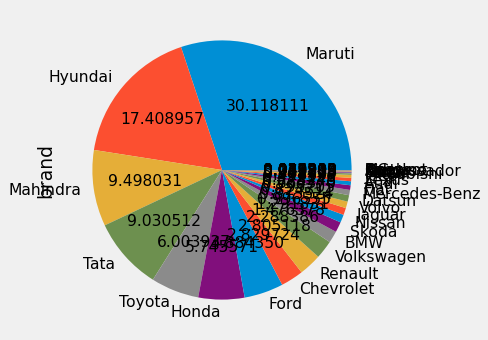

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(6, 5), dpi=80)
df["brand"].value_counts().plot(kind="pie",autopct="%2f")

In [9]:
df["fuel"].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

# nunique is used to find unique column in categorical variable

In [10]:
df["fuel"].nunique()

4

In [11]:
df["fuel"].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [12]:
# If i do one hotcoding new column is created total 32-1=31
df["brand"].nunique()

32

In [13]:
df["owner"].nunique()

5

In [14]:
df["owner"].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

# One HotEncoding Using Pandas

In [15]:
pd.get_dummies(df,columns=["fuel","owner"])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


# Dummy Variable Trap

In [16]:
pd.get_dummies(df,columns=["fuel","owner"],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [17]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [18]:
X = df.iloc[:,0:4]

In [19]:
y=df.iloc[:,-1]

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=0)

In [22]:
X_train.shape,X_test.shape

((5689, 4), (2439, 4))

# OnehotEncoding using Sklearn

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
oe = OneHotEncoder(drop="first",dtype=np.int32)

In [25]:
X_train_new = oe.fit_transform(X_train[["fuel","owner"]])

In [26]:
X_train_new

<5689x7 sparse matrix of type '<class 'numpy.int32'>'
	with 7645 stored elements in Compressed Sparse Row format>

In [27]:
X_train_new = X_train_new.toarray()

In [28]:
X_train_new

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [29]:
X_test_new = oe.transform(X_test[["fuel","owner"]]).toarray()

In [30]:
X_test_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

# Concet two things into one dataframe 
# X_train and X_train_new

# First we convert X_train(dataframe) into numpy

In [31]:
X_train[["brand","km_driven"]].values

array([['Tata', 20000],
       ['Maruti', 30000],
       ['Maruti', 15000],
       ...,
       ['Hyundai', 90000],
       ['Volkswagen', 90000],
       ['Hyundai', 110000]], dtype=object)

In [32]:
np.hstack((X_train[["brand","km_driven"]].values,X_train_new))

array([['Tata', 20000, 0, ..., 0, 0, 0],
       ['Maruti', 30000, 0, ..., 0, 0, 0],
       ['Maruti', 15000, 0, ..., 0, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

In [33]:
np.hstack((X_train[["brand","km_driven"]].values,X_train_new)).shape

(5689, 9)

In [34]:
pd.DataFrame(np.hstack((X_train[["brand","km_driven"]].values,X_train_new)))

,0,1,2,3,4,5,6,7,8
0,Tata,20000,0,0,1,0,0,0,0
1,Maruti,30000,0,0,1,0,0,0,0
2,Maruti,15000,0,0,1,0,0,0,0
3,Ford,53000,1,0,0,0,0,0,0
4,Chevrolet,120000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5684,Tata,70000,1,0,0,0,0,0,1
5685,Ford,100000,1,0,0,0,1,0,0
5686,Hyundai,90000,0,0,1,0,1,0,0
5687,Volkswagen,90000,1,0,0,0,0,0,0


# OneHotEncoding with Top Categories

In [35]:
count = df["brand"].value_counts()

In [36]:
threshold=100

In [37]:
count[count <= threshold].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Ambassador',
       'Kia', 'Daewoo', 'MG', 'Opel', 'Ashok', 'Peugeot'],
      dtype='object')

In [38]:
repl = count[count <= threshold].index

In [39]:
pd.get_dummies(df["brand"].replace(repl,"uncommon"))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
